In [15]:
import pandas as pd, numpy as np, matplotlib, matplotlib.pyplot as plt, warnings

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

warnings.filterwarnings('ignore')

#### Load dataset and print top 5 rows

In [3]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
# we will drop columns which did not impact more on prices , 

df1 = df.drop(['area_type','availability','society', 'balcony'], axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data cleaning

In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df2.shape

(13246, 5)

In [14]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

In [20]:
df2.sample(5)

,location,size,total_sqft,bath,price,bhk
9160,Sneha Colony,2 Bedroom,1050,2.0,110.00,2
10831,Whitefield,3 BHK,1990,3.0,98.00,3
7548,Panathur,2 BHK,1140,2.0,51.20,2
3164,Malleshwaram,4 Bedroom,5500,5.0,1500.00,4
8230,manyata park,2 BHK,1322,2.0,61.99,2


In [21]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [22]:
df2[df2.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [23]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [30]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [36]:
#convert_sqft_to_num('2150')
#convert_sqft_to_num('2100 - 2850')

In [37]:
df3 = df2.copy()

In [38]:
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [41]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)
df3.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [51]:
df3.sample(5)

,location,size,total_sqft,bath,price,bhk
8380,"Electronic city Phase 1,",2 BHK,950.0,2.0,33.0,2
4519,Sarjapur Road,2 BHK,985.0,2.0,49.0,2
7983,Electronic City,3 BHK,1159.0,2.0,38.0,3
70,Double Road,3 Bedroom,500.0,3.0,100.0,3
2639,Varthur Road,3 BHK,1655.0,3.0,115.0,3


### Feature Engineering

In [54]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [55]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [57]:
df4 = df3.copy()

df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [60]:
len(df4['location'].unique())     # we can see high curse of dimensionality

1304

In [61]:
df4.location = df4.location.apply(lambda x: x.strip())

# statistics on location
location_stats = df4.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                       1
1 Giri Nagar                                            1
1 Immadihalli                                           1
1 Ramamurthy Nagar                                      1
12th cross srinivas nagar banshankari 3rd stage         1
1A Block Koramangala                                    1
1Channasandra                                           1
1Hanuman Nagar                                          1
1Hoysalanagar                                           1
1Kasavanhalli                                           1
1st Block BEL Layout                                    2
1st Block HBR Layout                                    3
1st Block HRBR Layout                                   8
1st Block Jayanagar                                    14
1st Block Koramangala                                  10
1st Phase JP Nagar                                     25
1st Stage Domlur                                        1
1st S

In [62]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                            535
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        266
Thanisandra                                           236
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           150
7th Phase JP Nagar                                    149
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [63]:
len(location_stats[location_stats <= 10])

1052

In [64]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Basapura                                              10
1st Block Koramangala                                 10
Gunjur Palya                                          10
Kalkere                                               10
Sector 1 HSR Layout                                   10
Dairy Circle                                          10
Naganathapura                                         10
Sadashiva Nagar                                       10
Nagadevanahalli                                       10
BTM 1st Stage                                         10
Nagappa Reddy Layout                                  10
Dodsworth Layout                                      10
Ganga Nagar                                           10
2nd Phase JP Nagar                                     9
Volagerekallahalli                                     9
Yemlur                                                 9
4th Block Koramangala                                  9
Lingarajapuram        

In [65]:
len(df4.location.unique())

1293

In [66]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

len(df4.location.unique())

242

In [67]:
df4.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10744,Hulimavu,1 BHK,581.0,1.0,29.0,1,4991.394148
13118,other,2 BHK,1200.0,2.0,45.0,2,3750.000000
11752,Uttarahalli,2 BHK,1000.0,2.0,39.5,2,3950.000000
9560,Haralur Road,1 BHK,560.0,1.0,45.0,1,8035.714286
3196,8th Phase JP Nagar,3 BHK,1800.0,3.0,80.0,3,4444.444444
10392,Electronic City,3 BHK,1160.0,2.0,42.0,3,3620.689655
4919,other,2 BHK,1340.0,2.0,77.0,2,5746.268657
8520,Parappana Agrahara,2 BHK,1194.0,2.0,47.0,2,3936.348409
6273,Whitefield,3 BHK,1548.0,3.0,65.0,3,4198.966408
10985,Yelahanka,2 BHK,1185.0,2.0,45.0,2,3797.468354


## Outlier detection   here our domain knowledge comes into picture

In [69]:
df4[df4.total_sqft/df4.bhk < 300].head(8)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333


In [70]:
df4.shape

(13246, 7)

In [71]:
df5 = df4[~ (df4.total_sqft/df4.bhk < 300)]
df5.shape

(12502, 7)

In [72]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [77]:
# now we will remove outier from price_per_sqft column

def pps_outliers_remove(df):
    df_out = pd.DataFrame()
    
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - std)) & (subdf.price_per_sqft <= (m + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [78]:
df6 = pps_outliers_remove(df5)
df6.shape

(10241, 7)

In [76]:
12502-10241    # no of outliers removed

2261

In [87]:
def plot_scatter(df, location):
    bhk2 = df[(df.location==location) & (df.bhk == 2)]
    bhk3 = df[(df.location==location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='*',color='red', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("price per sq feet")
    plt.title(location)
    plt.legend()

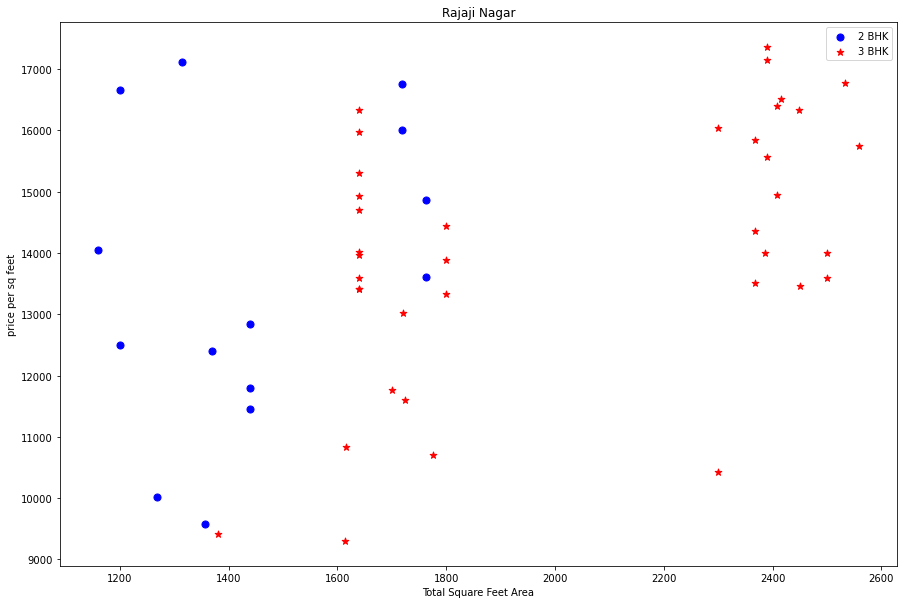

In [88]:
plot_scatter(df6, "Rajaji Nagar")

### we have to remove those 2BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [95]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }   
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index_values)
                
    return df.drop(exclude_indices, axis='index')

In [97]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')



df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

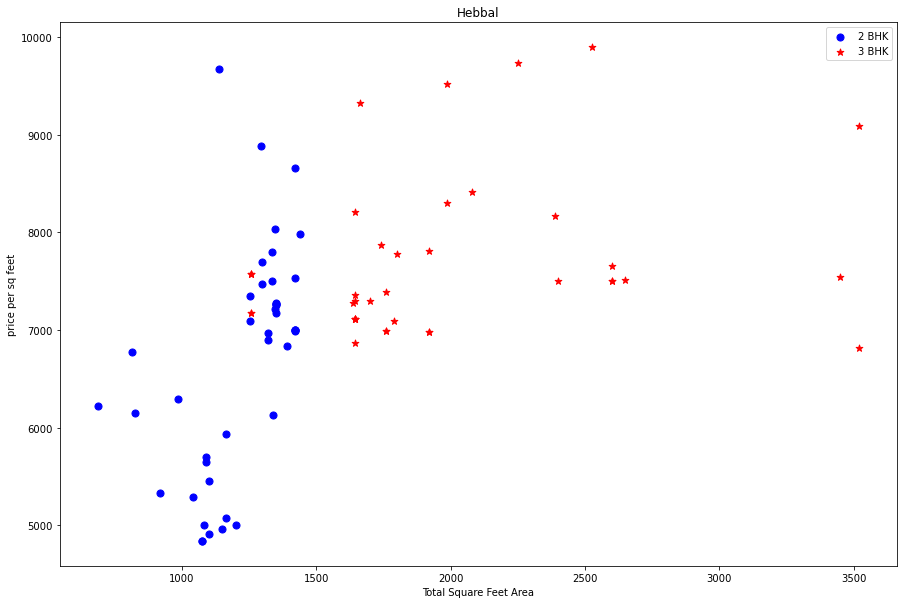

In [100]:
plot_scatter(df7,"Hebbal")

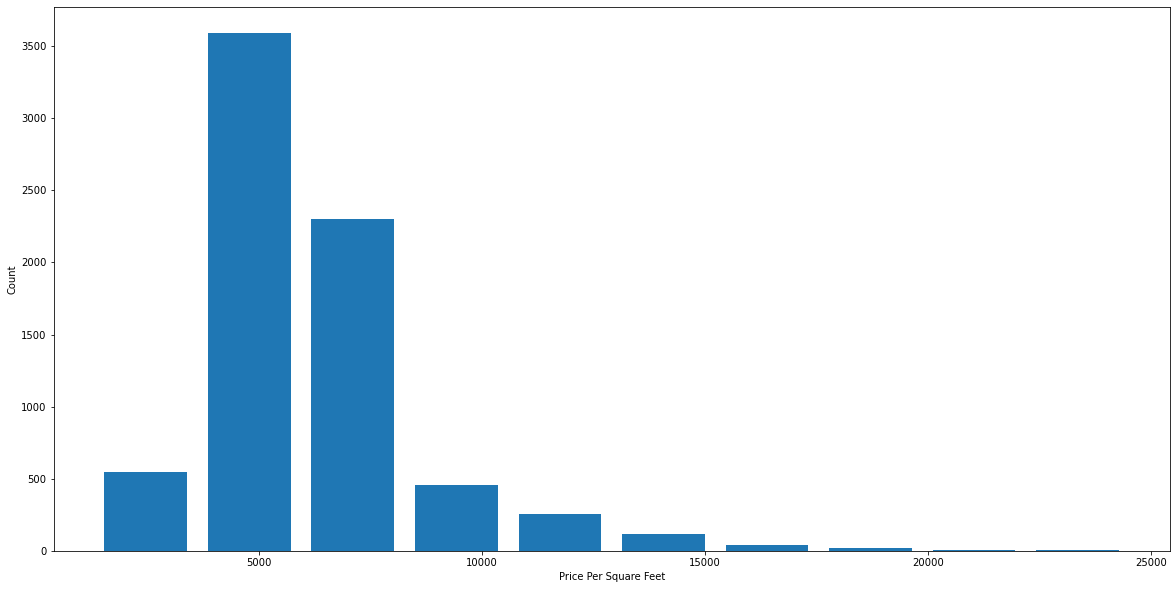

In [102]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count");

In [103]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [104]:
df7[df7.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


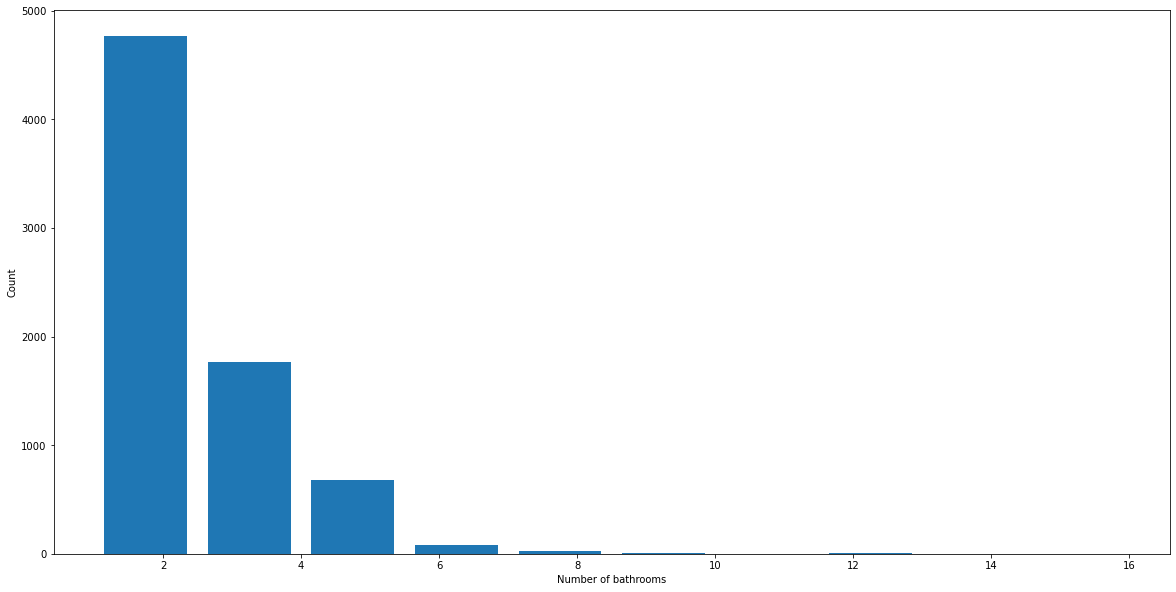

In [106]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count");

In [108]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [109]:
df8 = df7[df7.bath < df7.bhk+2]

df8.shape

(7251, 7)

In [110]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(5)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [112]:
dummies = pd.get_dummies(df9.location)
dummies.sample(4)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4579,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [113]:
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [114]:
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# Model Building

In [115]:
df11.shape

(7251, 245)

In [116]:
X = df11.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [117]:
y = df11.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

#### Train test split

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [119]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [120]:
lr.score(X_test,y_test)

0.8452277697874279

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [121]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

### We can see that in 5 iterations we get a score above 80%

In [122]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [123]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687430,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.717218,"{'criterion': 'mse', 'splitter': 'best'}"


#### Testing model

In [125]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [126]:
predict_price('Indira Nagar',1000, 3, 3)

184.584302020336

In [127]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677167738

In [128]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.80519395194304

In [129]:
predict_price('Indira Nagar',1000, 2, 2)

181.27815484007036

## Export the tested model to a pickle file

In [132]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))